# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

## ImageAnalysis3 and basic modules

In [24]:
# Pu's ImageAnalysis3
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib inline

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast


31552


# Define folders

In [25]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'method_overview')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\method_overview\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\method_overview\figures.


# Plotting parameters

In [26]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [27]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = output_figure_folder

## cell type color-codes

In [28]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


# Load RNA-MERFISH results

In [29]:
import scanpy as sc

In [30]:
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'new_labeled_data.h5ad'))

In [31]:
merged_adata

AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

## UMAP

In [32]:
print(len(np.unique(merged_adata.obs['subclass_label_new'])))
np.unique(merged_adata.obs['subclass_label_new'])

22


array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'other'],
      dtype=object)

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


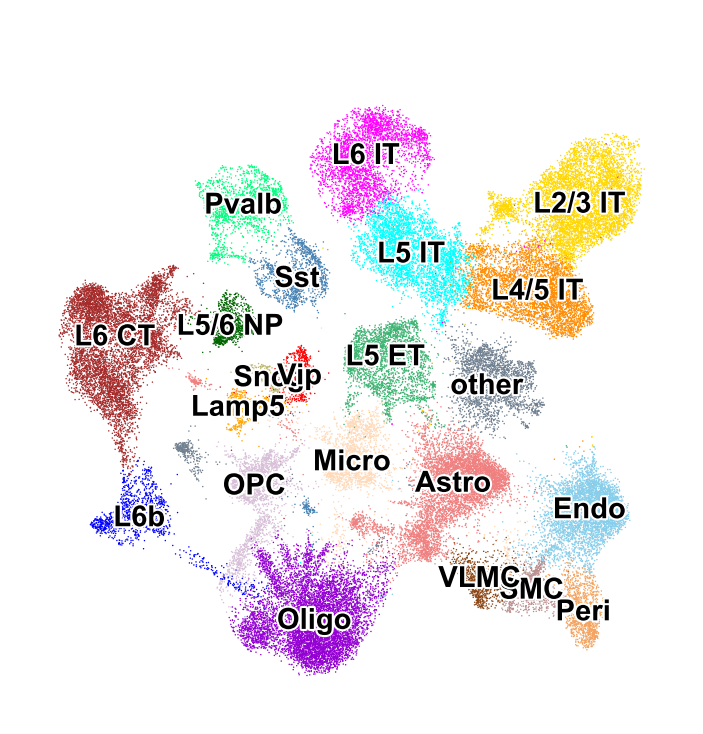

In [33]:
# Plot UMAP to check; modify the plotting appearance later
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white',)


#check for other palette options: https://matplotlib.org/stable/tutorials/colors/colormaps.html

umap_ax = sc.pl.umap(merged_adata, color='subclass_label_new', 
           title = ' ', 
           size=_font_size,
           #palette = 'terrain',
           s=0.5,
           palette = celltype_palette,
           legend_fontoutline = True,
           legend_loc='on data',
           #save=True,
           save=f'_MOp_celltype_UMAP.pdf',
          )



## spatial distribution

In [34]:
np.unique(merged_adata.obs['experiment'])

array(['20220304', '20220329', '20220415', '20220418'], dtype=object)

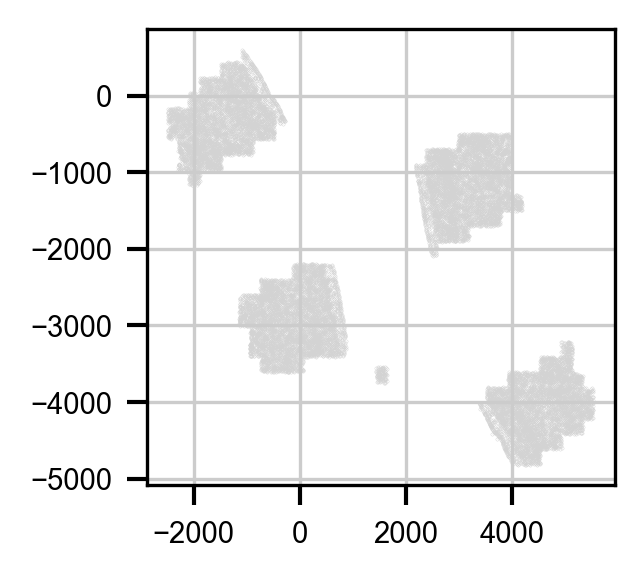

In [35]:
sel_exp_name = '20220415'
sel_exp_adata = merged_adata[merged_adata.obs['experiment']==sel_exp_name]
fig, ax = plt.subplots(figsize=(2,2))
ax.scatter(sel_exp_adata.obs['center_x'], sel_exp_adata.obs['center_y'], c='lightgrey', s=0.01)

meta NOT subset; don't know how to subset; dropped


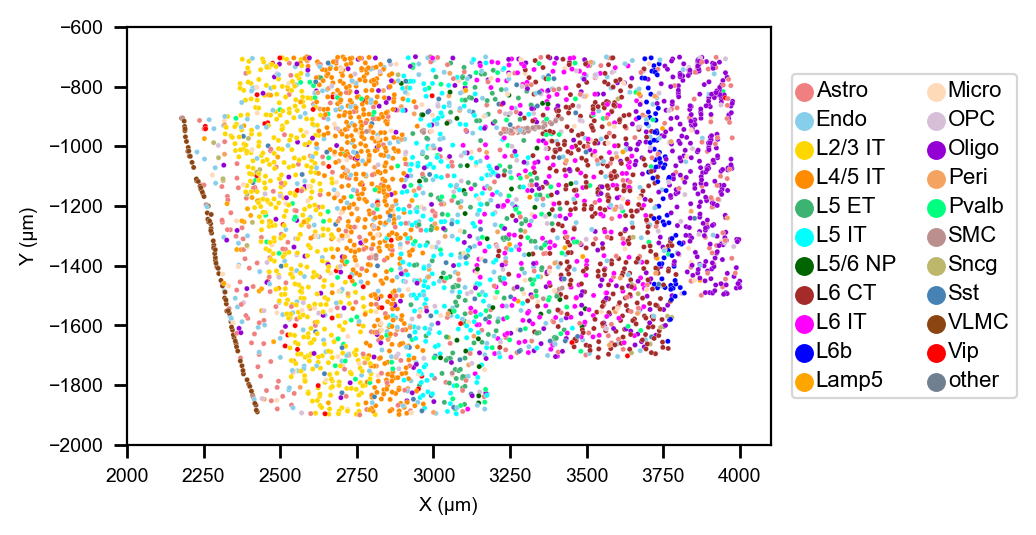

In [36]:
adata_small = sel_exp_adata.obs[(sel_exp_adata.obs['center_x']>2000) & (sel_exp_adata.obs['center_x']<4000)]
adata_small = adata_small[(adata_small['center_y']>-1900) & (adata_small['center_y']<-700)]

x1, x2 = 2000, 4100
y1, y2 = -2000, -600

fig, ax = plt.subplots(figsize=(_page_width/2*((x2-x1)/(y2-y1)),_page_width/2),dpi=100)

gfg = sns.scatterplot(data=adata_small, 
                x='center_x', 
                y='center_y', 
                hue='subclass_label_new', 
                ax =ax,
                palette = celltype_palette, 
                s=3.5, linewidth=.1, 
                rasterized=True,
                     )

ax.legend().set_title('')
sns.move_legend(ax, "center left", 
                bbox_to_anchor=(1.02, 0.5), 
                ncol=2)
# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize=f'{_font_size+1}') 
 
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='0') 


plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size) 

#plt.axis('equal')
#plt.legend(loc='best')
ax.set_xlim([x1,x2])
ax.set_ylim([y1,y2])
plt.xlabel('X (\u03bcm)', fontsize=_font_size)
plt.ylabel('Y (\u03bcm)', fontsize=_font_size)
ax.grid(False)

plt.savefig(os.path.join(output_figure_folder, f'MOp_celltype_spatial_exp{sel_exp_name}.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

# Load celltype stats after DNA-MERFISH

## cell number from CellInfoList

In [37]:
# subclass info
import pickle
subclass_2_cellInfoList_filename = os.path.join(input_folder, 'subclass_2_cellInfo.pkl')
subclass_2_cellInfoList = pickle.load(open(subclass_2_cellInfoList_filename, 'rb'))

In [38]:
#subclass_2_cellInfoList
# sort celltype by order
sorted_celltype_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]


sorted_types = []
sorted_counts = []
bar_color_list = []
for _type in sorted_celltype_labels:
    if _type in subclass_2_cellInfoList.keys():
        sorted_types.append(_type)
        sorted_counts.append(len(subclass_2_cellInfoList[_type]))
        bar_color_list.append(celltype_palette[_type])
    else:
        continue

In [39]:
np.sum(sorted_counts)

46340

## plot barplots for numbers

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_31552\2360754458.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_31552\2360754458.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
meta NOT subset; don't know how to subset; dropped


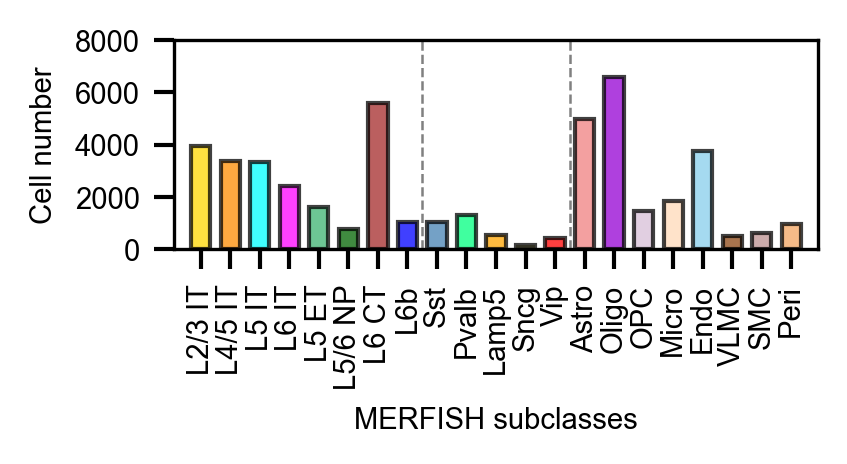

In [40]:
# print class number
#plt.style.use('default')

edge_width = 0.9

fig, ax = plt.subplots(figsize=(_page_width/2,(_page_width/2)/3), dpi=_dpi/2)

ax.bar(sorted_types, sorted_counts, 
       edgecolor = 'black', 
       linewidth = 1,
       alpha = 0.75,
       color = bar_color_list, width=0.65)


ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
#ax.set_yticklabels(types, rotation=45, fontsize=12)
ax.grid(False)

ax.set_ylim([0, 8000])
ax.set_xlim([-edge_width, len(sorted_types)-1+edge_width])

plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)   
#plt.xticks(rotation = 75)
plt.yticks([0,2000,4000,6000,8000])
#plt.xlabel(ref_cluster_column, size=12) 
#plt.ylabel(check_query_cluster_column, size=12)

plt.xlabel('MERFISH subclasses', size=_font_size) 
plt.ylabel('Cell number', size=_font_size)

ex_cells = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',]
in_cells = ['Sst','Pvalb','Lamp5','Sncg','Vip',]
ax.axvline(x=len(ex_cells)-.5, linestyle='dashed', color='gray', linewidth=0.6, alpha=1)
ax.axvline(x=len(ex_cells)+len(in_cells)-.5, linestyle='dashed',color='gray',linewidth=0.6, alpha=1)

fig.show()

plt.savefig(os.path.join(output_figure_folder, f'MOp_celltype_number_forDNA.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

## plot excitatory celltype fractions

In [41]:
sorted_celltype_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]

cellgroup_num_dict = {}
for _type in sorted_celltype_labels:
    if _type in subclass_2_cellInfoList.keys():
        cellgroup_num_dict[_type] = len(subclass_2_cellInfoList[_type])
    else:
        continue

meta NOT subset; don't know how to subset; dropped


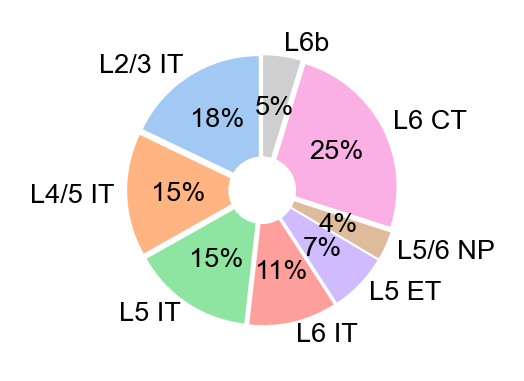

In [42]:
# excitatory

cell_to_plot = ['L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L5 ET','L5/6 NP','L6 CT','L6b']


cell_num = [cellgroup_num_dict[_type] for _type in cell_to_plot]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

explode_list = [0.05]*len(cell_to_plot)

fig, ax = plt.subplots(figsize=(_page_width/3.9,(_page_width/3.9)), dpi=_dpi/2)

# create pie chart using matplotlib
ax.pie(cell_num, labels=cell_to_plot, colors=colors,startangle=90, autopct='%1.0f%%',
        explode=explode_list,textprops={'fontsize': _font_size-0.5})

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.25, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams.update({'font.size': _font_size-0.5})


plt.savefig(os.path.join(output_figure_folder, f'MOp_Gluta_piechart_forDNA.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')
plt.show()

## plot inhibitory celltype fractions

meta NOT subset; don't know how to subset; dropped


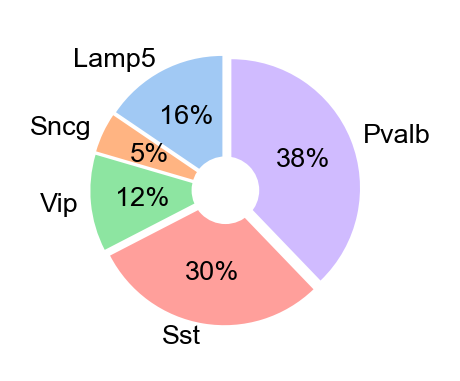

In [43]:
# inhibitory

cell_to_plot = ['Lamp5','Sncg','Vip','Sst','Pvalb']


cell_num = [cellgroup_num_dict[_type] for _type in cell_to_plot]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

explode_list = [0.05]*len(cell_to_plot)

fig, ax = plt.subplots(figsize=(_page_width/3.9,(_page_width/3.9)), dpi=_dpi/2)

# create pie chart using matplotlib
ax.pie(cell_num, labels=cell_to_plot, colors=colors,startangle=90, autopct='%1.0f%%',
        explode=explode_list,textprops={'fontsize': _font_size-0.5})

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.25, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams.update({'font.size': _font_size-0.5})


plt.savefig(os.path.join(output_figure_folder, f'MOp_GABA_piechart_forDNA.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()